In [1]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex)
            # Explore neighbors
            neighbors = graph[vertex]
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)

# Example usage
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
start_vertex = 'A'
bfs(graph, start_vertex)

A
B
C
D
E
F


In [2]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)  # Assuming an undirected graph

    def iterative_dfs(self, start, end):
        if start == end:
            return [start]
        visited = set()
        stack = [(start, [start])]
        while stack:
            current_vertex, path = stack.pop()
            visited.add(current_vertex)
            for neighbor in self.graph[current_vertex]:
                if neighbor not in visited:
                    if neighbor == end:
                        return path + [neighbor]
                    stack.append((neighbor, path + [neighbor]))
        return None  # No path found

# Example usage:
if __name__ == "__main__":
    g = Graph()
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(2, 4)
    g.add_edge(2, 5)
    g.add_edge(3, 6)
    g.add_edge(3, 7)
    g.add_edge(4, 8)
    g.add_edge(4, 9)
    g.add_edge(5, 10)
    g.add_edge(5, 11)
    g.add_edge(6, 12)
    g.add_edge(6, 13)
    g.add_edge(7, 14)
    g.add_edge(7, 15)
    
    start_node = 1
    end_node = 9
    shortest_path = g.iterative_dfs(start_node, end_node)
    if shortest_path:
        print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
    else:
        print(f"No path found from {start_node} to {end_node}")

Shortest path from 1 to 9: [1, 2, 4, 9]


In [3]:
from queue import PriorityQueue

class Node:
    def __init__(self, state, parent=None, f=float('inf')):
        self.state = state
        self.parent = parent
        self.f = f

def rbfs(start, goal):
    f_limit = float('inf')
    stack = [(Node(start, f=0), f_limit)]
    visited = set()
    
    while stack:
        (node, f) = stack.pop()
        visited.add(node.state)
        
        if node.state == goal:
            path = []
            cost = node.f
            while node is not None:
                path.append(node.state)
                node = node.parent
            return list(reversed(path)), cost
        
        successors = []
        for neighbor, cost in get_neighbors(node.state):
            if neighbor not in visited:
                child = Node(neighbor, parent=node)
                child.f = max(child.parent.f, cost)
                successors.append(child)
        
        if len(successors) == 0:
            continue
        
        successors.sort(key=lambda x: x.f)
        best = successors[0]
        
        if best.f > f_limit:
            return None, best.f
        
        alternative = successors[1].f if len(successors) > 1 else float('inf')
        stack.append((best, min(f_limit, alternative)))
    
    return None, float('inf')

def get_neighbors(state):
    # Define the successors for each state with their associated costs (simplified example).
    successors = {
        1: [(2, 3), (3, 5)],
        2: [(1, 3), (4, 7)],
        3: [(1, 5), (5, 2)],
        4: [(2, 7), (6, 4)],
        5: [(3, 2), (7, 6)],
        6: [(4, 4), (8, 8)],
        7: [(5, 6), (8, 5)],
        8: [(6, 8), (7, 5)],
    }
    return successors.get(state, [])

if __name__ == '__main__':
    start_state = 1
    goal_state = 8
    path, cost = rbfs(start_state, goal_state)
    
    if path is not None:
        print(f"Optimal path from {start_state} to {goal_state}:")
        print(" -> ".join(map(str, path)))
        print(f"Total cost: {cost}")
    else:
        print("No path found.")

Optimal path from 1 to 8:
1 -> 2 -> 4 -> 6 -> 8
Total cost: 8


In [6]:
import seaborn as sns
data = sns.load_dataset('iris')
data.drop(['species'], axis=1, inplace=True)

Accuracy: 1.00


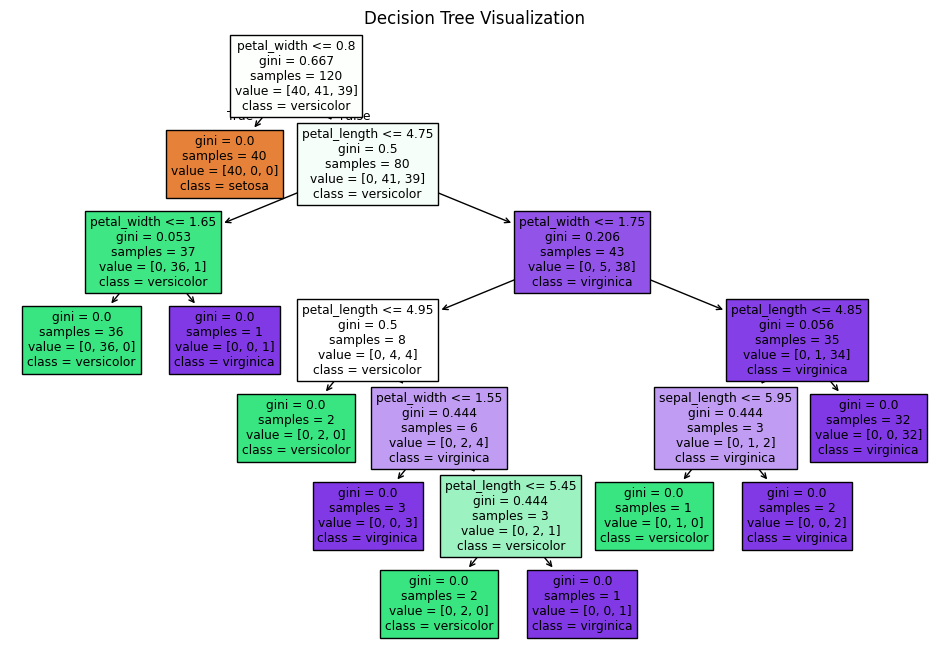

In [8]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

data = sns.load_dataset('iris')

X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique().astype(str))
plt.title("Decision Tree Visualization")
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
data = sns.load_dataset('iris')
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear') # You can choose
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
